

## Applying ARIMA, auto_arima(seasonal=true/false), forecasting, plotting with conf-int

predicting tomorrow's stock returns for nifty 50. Used scaled return not log return.

In [120]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [121]:
full_data=yf.download(['^NSEI'])

# train test split
s=int(len(full_data)*0.8)

data=full_data[:s]
test=full_data[s:]

[*********************100%***********************]  1 of 1 completed


In [122]:
type(data)

pandas.core.frame.DataFrame

In [123]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2903 entries, 2007-09-17 to 2019-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2903 non-null   float64
 1   High       2903 non-null   float64
 2   Low        2903 non-null   float64
 3   Close      2903 non-null   float64
 4   Adj Close  2903 non-null   float64
 5   Volume     2903 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 158.8 KB


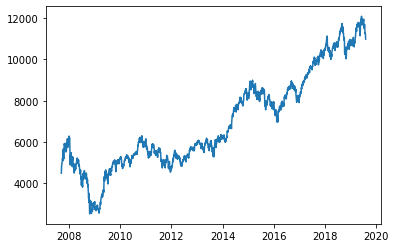

In [125]:
plt.plot(data[['Close']])

In [126]:
ts=pd.Series.diff(data[['Close']])

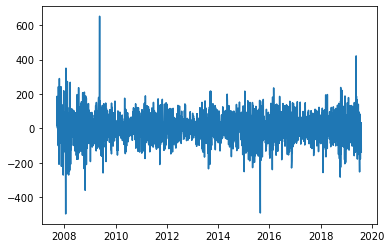

In [127]:
plt.plot(ts)

In [128]:
data['Return']=data['Close']-data['Open']

C:\Users\prano\AppData\Local\Temp/ipykernel_16624/4230238524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return']=data['Close']-data['Open']


In [170]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,vol
Date,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,-23.800293,66.199707
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,52.100098,70.250000
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,182.100098,188.750000
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,12.699707,39.700195
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,84.599609,122.000000


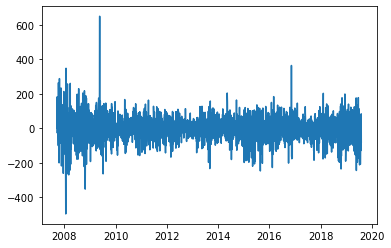

In [130]:
plt.plot(data[['Return']])

In [131]:
data.mean()

Open           6987.585878
High           7029.983194
Low            6934.844330
Close          6982.966192
Adj Close      6982.966192
Volume       113121.977265
Return           -4.619685
dtype: float64

In [132]:
data.std()

Open           2317.191435
High           2312.863145
Low            2315.670303
Close          2313.545464
Adj Close      2313.545464
Volume       122247.385490
Return           70.374448
dtype: float64

In [133]:
ts.mean()

0    2.234786
dtype: float64

In [134]:
ts.std()

0    76.930817
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

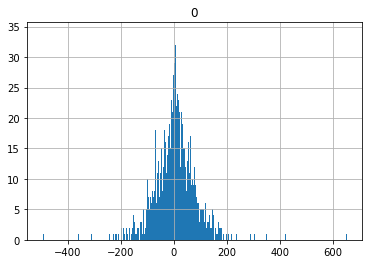

In [135]:
ts.hist(bins=1000)

<AxesSubplot:>

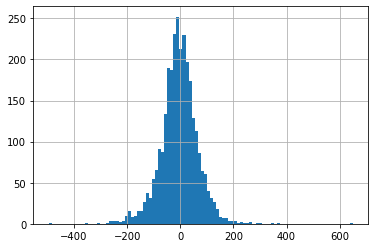

In [136]:
data['Return'].hist(bins=100)

In [137]:
len(ts)

2903

In [138]:
#daily volatility
data['vol']=data.High-data.Low

C:\Users\prano\AppData\Local\Temp/ipykernel_16624/834609477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vol']=data.High-data.Low


<AxesSubplot:xlabel='Date'>

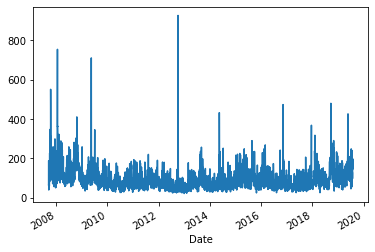

In [139]:
data['vol'].plot()

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Return'}>,
        <AxesSubplot:title={'center':'vol'}>, <AxesSubplot:>]],
      dtype=object)

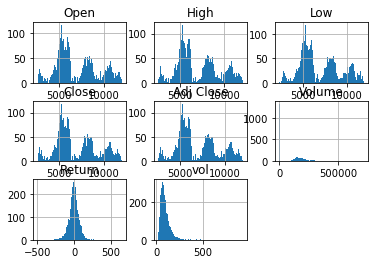

In [140]:
data.hist(bins=100)

In [141]:
# exponentially weighted moving average for smoothing
ewmadf=data.ewm(halflife=10).mean()

<AxesSubplot:xlabel='Date'>

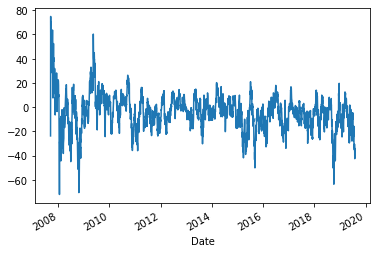

In [142]:
ewmadf['Return'].plot()

In [143]:
ewmvdf=data.ewm(halflife=10).std()

In [144]:
# scaling
scaled=(data-ewmadf)/ewmvdf

<AxesSubplot:xlabel='Date'>

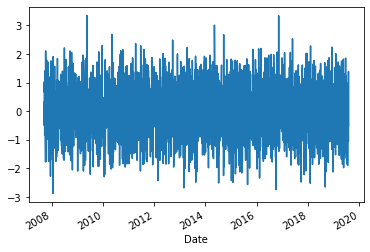

In [145]:
scaled['Return'].plot()

In [146]:
tsdf=scaled.drop('Volume',axis=1)
tsdf=tsdf.dropna()

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

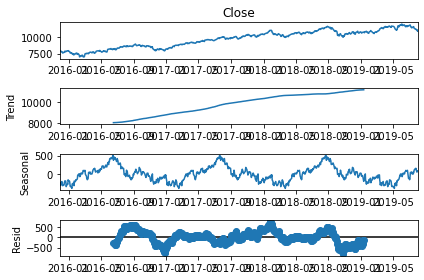

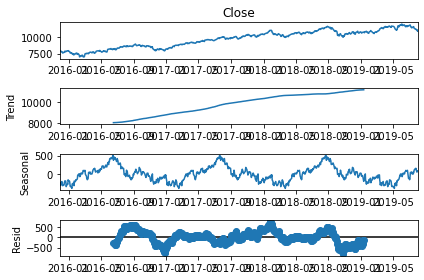

In [148]:
s=seasonal_decompose(data['Close'][2000:3600],period=270,model='additive')# data.close has decomp,
#tsdf.close has much less decomp
s.plot() 

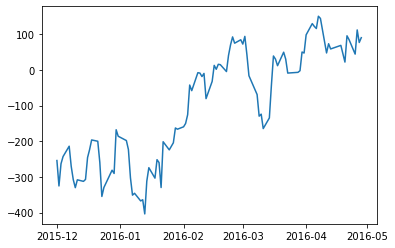

In [149]:
plt.plot(s.seasonal[1:100])

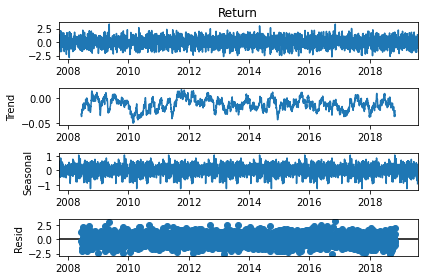

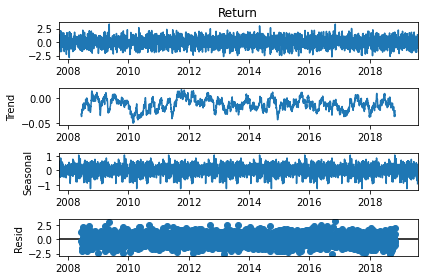

In [150]:
s=seasonal_decompose(tsdf['Return'],period=365,model='additive')# return has no decomp
s.plot() 

In [151]:
# stationarity ADF test
from statsmodels.tsa.stattools import adfuller as adf

In [152]:
ad=adf(tsdf['Return'])

In [153]:
ad # second number is the p-value, low means stationary

(-22.169476447606126,
 0.0,
 7,
 2894,
 {'1%': -3.432611613600796,
  '5%': -2.862539228682693,
  '10%': -2.5673019179781917},
 7611.302617575921)

In [154]:
# ACF (gives AR), PACF (gives MA)
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

In [155]:
autocorr=acf(tsdf['Return'],nlags=10,alpha=0.05)

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [156]:
autocorr

(array([ 1.        , -0.01287937, -0.02992617, -0.01829762, -0.03431318,
        -0.06563747, -0.02169641, -0.02978126, -0.02581634,  0.01267538,
        -0.01403133]),
 array([[ 1.        ,  1.        ],
        [-0.04926244,  0.0235037 ],
        [-0.06631528,  0.00646294],
        [-0.05471929,  0.01812406],
        [-0.07074702,  0.00212065],
        [-0.10211406, -0.02916088],
        [-0.05832901,  0.0149362 ],
        [-0.06643087,  0.00686835],
        [-0.06249797,  0.01086529],
        [-0.02403029,  0.04938105],
        [-0.0507428 ,  0.02268014]]))

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


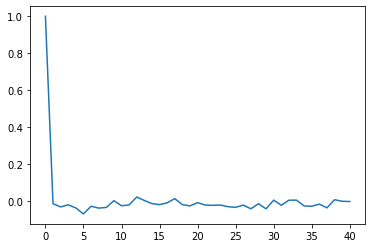

In [157]:
pautocorr=pacf(tsdf['Return'])
plt.plot(pautocorr)

In [158]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

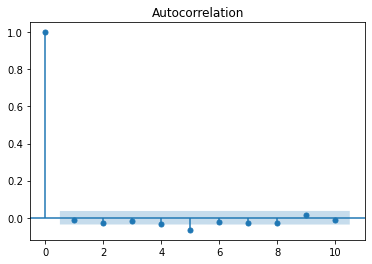

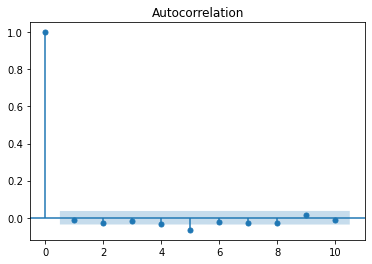

In [159]:
plot_acf(tsdf['Return'],lags=10,alpha=0.05) # inside the band then not relevant

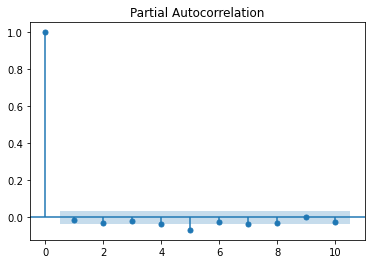

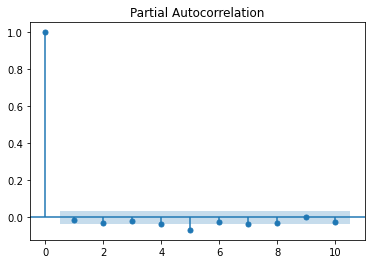

In [160]:
plot_pacf(tsdf['Return'],lags=10,alpha=0.05) # inside the band then not relevant

In [161]:
from statsmodels.tsa.arima.model import ARIMA

In [162]:
model=ARIMA(tsdf[['Return']],order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Return   No. Observations:                 2902
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3823.471
Date:                Mon, 11 Jul 2022   AIC                           7654.942
Time:                        11:39:19   BIC                           7678.835
Sample:                             0   HQIC                          7663.551
                               - 2902                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0131      0.001    -23.013      0.000      -0.014      -0.012
ar.L1          0.9546      0.006    165.720      0.000       0.943       0.966
ma.L1         -1.0000      0.072    -13.980      0.000      -1.140      -0.860
sigma2         0.8153      0.062     13.194      0.000       0.694       0.936
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.60   Prob(JB):                         0.47
Heteroskedasticity (H):               1.00   Skew:                            -0.04
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

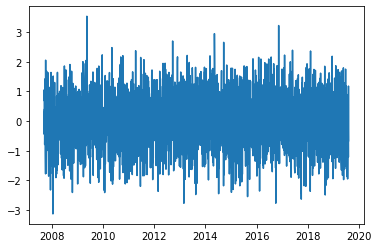

In [163]:
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

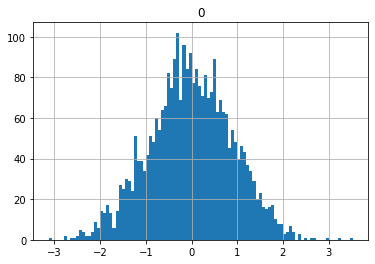

In [164]:
residuals.hist(bins=100)

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


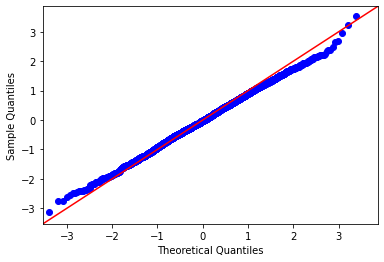

In [165]:
sm.qqplot(residuals[0],line='45')
plt.show()

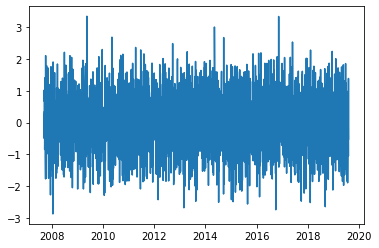

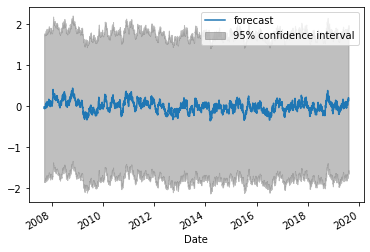

In [166]:
from statsmodels.graphics.tsaplots import plot_predict

plt.plot(tsdf[['Return']])
plot_predict(model_fit)
plt.show()

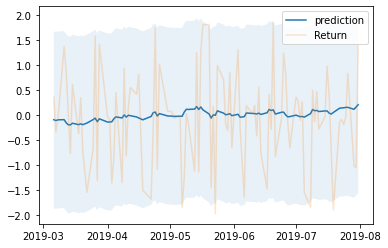

In [167]:
p=model_fit.get_prediction() # model_fir is a result wrapper, get_prediction and get_forecast 
conf_int=p.conf_int(alpha=0.05)

plt.plot(model_fit.predict()[-100:-1],label='prediction')
plt.plot(tsdf[['Return']][-100:-1],alpha=0.2,label='Return')
plt.fill_between(conf_int.index[-100:-1],conf_int.iloc[:,0][-100:-1],conf_int.iloc[:,1][-100:-1],alpha=0.1)
plt.legend()
plt.show()

In [174]:
# return on test set
test['Return']=test['Close']-test['Open']
ewmadf_t=test.ewm(halflife=10).mean()
ewmvdf_t=test.ewm(halflife=10).std()

scaled_t=(test-ewmadf_t)/ewmvdf_t

tsdf_t=scaled_t.drop('Volume',axis=1)
tsdf_t=tsdf_t.dropna()


C:\Users\prano\AppData\Local\Temp/ipykernel_16624/3367449981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Return']=test['Close']-test['Open']


Return      mean   mean_se  mean_ci_lower  mean_ci_upper
2902    0.170479  0.903098      -1.599561       1.940519
2903    0.162140  0.904015      -1.609697       1.933977
2904    0.154179  0.904850      -1.619294       1.927653
2905    0.146581  0.905610      -1.628382       1.921544
2906    0.139327  0.906302      -1.636993       1.915646
2907    0.132403  0.906932      -1.645152       1.909957
2908    0.125793  0.907506      -1.652886       1.904472
2909    0.119483  0.908029      -1.660220       1.899187
2910    0.113460  0.908504      -1.667176       1.894096
2911    0.107711  0.908938      -1.673775       1.889196
2912    0.102223  0.909333      -1.680037       1.884482
2913    0.096984  0.909692      -1.685981       1.879948
2914    0.091982  0.910020      -1.691624       1.875588
2915    0.087208  0.910318      -1.696982       1.871399
2916    0.082651  0.910590      -1.702072       1.867375


C:\Users\prano\anaconda3\envs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


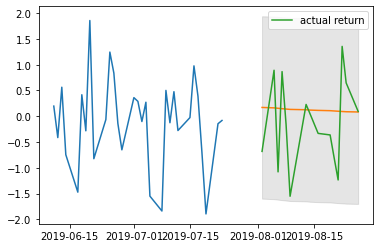

In [177]:
# forecast
steps=15
f=model_fit.get_forecast(steps=steps)
type(f)
print(f.summary_frame())

plt.plot(tsdf['Return'].iloc[2864:2895])
fcast = f.summary_frame()
fcast.index=test.index[:steps]

plt.plot(fcast['mean'])
plt.fill_between(fcast.index,fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)
plt.plot(test.index[:steps],tsdf_t['Return'][:steps],label='actual return')
plt.legend()
plt.show()

auto_arima, sarima, forecast

In [ ]:
## rolling forecast

# refer GARCH.ipynb for this code snippet